In [4]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 56s 0us/step


In [6]:
x_train = tf.image.resize(x_train, (75, 75))
x_test = tf.image.resize(x_test, (75, 75))

In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)


In [9]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


In [10]:
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(x_test, y_test)
)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 160s 95ms/step - accuracy: 0.5207 - loss: 1.3765 - val_accuracy: 0.6157 - val_loss: 1.1267
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 163s 104ms/step - accuracy: 0.5911 - loss: 1.1736 - val_accuracy: 0.6227 - val_loss: 1.0908
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 150s 96ms/step - accuracy: 0.6136 - loss: 1.0973 - val_accuracy: 0.6255 - val_loss: 1.0802
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 149s 95ms/step - accuracy: 0.6305 - loss: 1.0461 - val_accuracy: 0.6333 - val_loss: 1.0709
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 151s 96ms/step - accuracy: 0.6462 - loss: 1.0026 - val_accuracy: 0.6354 - val_loss: 1.0666


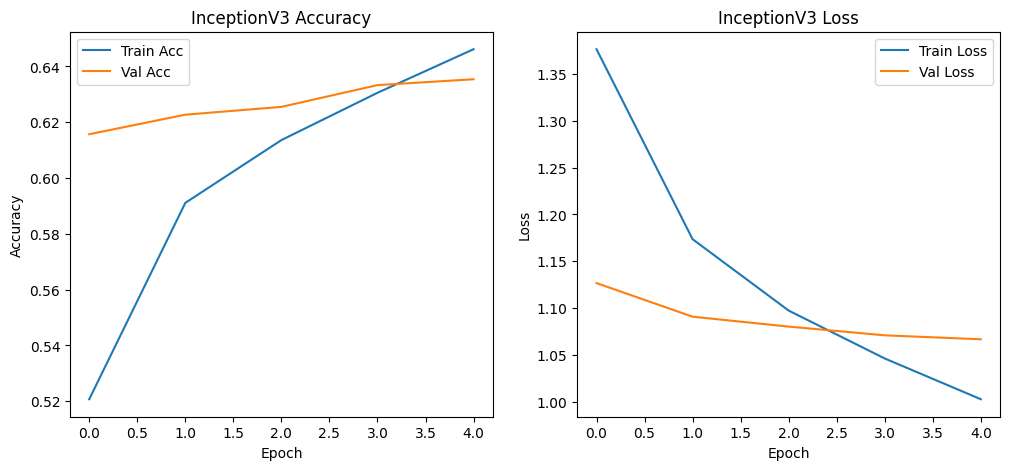

In [13]:
#plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('InceptionV3 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('InceptionV3 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()